In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
img_height, img_width = 100, 100
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "D:/garbage/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "D:/garbage/valid",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "D:/garbage/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 8879 files belonging to 9 classes.
Found 1399 files belonging to 9 classes.
Found 2742 files belonging to 9 classes.


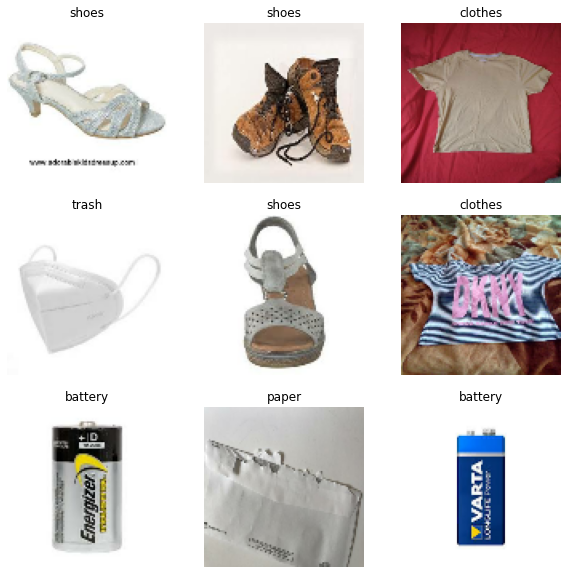

In [3]:
class_names = ["battery", "cardboard", "clothes", "glass", "metal", "paper", "plastic", "shoes", "trash"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [4]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 9, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 9, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 9, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(9)
    ]
)


In [5]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [6]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
444/444 [==============================] - 213s 476ms/step - loss: 1.5810 - accuracy: 0.4689 - val_loss: 1.5404 - val_accuracy: 0.4525
Epoch 2/10
444/444 [==============================] - 223s 501ms/step - loss: 1.2207 - accuracy: 0.5810 - val_loss: 1.4428 - val_accuracy: 0.5154
Epoch 3/10
444/444 [==============================] - 214s 482ms/step - loss: 1.1224 - accuracy: 0.6165 - val_loss: 1.3523 - val_accuracy: 0.5397
Epoch 4/10
444/444 [==============================] - 206s 465ms/step - loss: 1.0071 - accuracy: 0.6581 - val_loss: 1.4459 - val_accuracy: 0.5304
Epoch 5/10
444/444 [==============================] - 207s 465ms/step - loss: 0.8880 - accuracy: 0.7006 - val_loss: 1.3084 - val_accuracy: 0.5726
Epoch 6/10
444/444 [==============================] - 215s 485ms/step - loss: 0.7743 - accuracy: 0.7387 - val_loss: 1.3544 - val_accuracy: 0.5868
Epoch 7/10
444/444 [==============================] - 209s 470ms/step - loss: 0.6770 - accuracy: 0.7682 - val_loss: 1.4428 -

In [7]:
model.evaluate(test_ds)

138/138 [==============================] - 15s 110ms/step - loss: 1.8340 - accuracy: 0.5977


[1.8340460062026978, 0.5977388620376587]

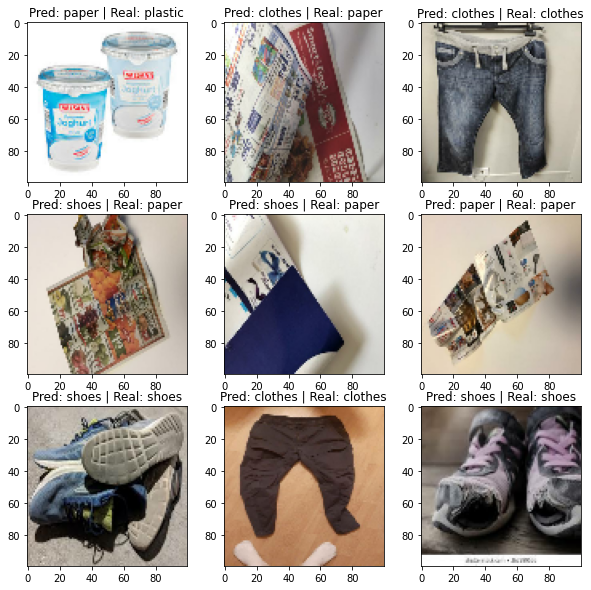

In [8]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [9]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("recyclingmodel.tflite", 'wb') as f:    
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ayanb\AppData\Local\Temp\tmpqmexxj30\assets


INFO:tensorflow:Assets written to: C:\Users\ayanb\AppData\Local\Temp\tmpqmexxj30\assets
